<a href="https://colab.research.google.com/github/fralfaro/MAT281/blob/main/docs/labs/lab_06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°06


**Objetivo**: Aplicar técnicas básicas de **Machine Learning**, desde la preparación de datos hasta el entrenamiento y evaluación de modelos.




<p align="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ec/Anscombe%27s_quartet_3.svg/1200px-Anscombe%27s_quartet_3.svg.png" width="500"/>
</p>

El **cuarteto de Anscombe** es un ejemplo clásico en estadística que ilustra cómo diferentes conjuntos de datos pueden compartir las mismas propiedades estadísticas, como media, varianza y correlación, pero presentan comportamientos muy distintos cuando se visualizan gráficamente. Cada uno de los cuatro conjuntos consiste en once puntos (x, y) y fue creado por el estadístico F. J. Anscombe en 1973. Esta herramienta resalta la importancia de la visualización de datos para evitar interpretaciones erróneas basadas únicamente en análisis numéricos.

**Descripción del conjunto**

1. **Propiedades estadísticas comunes:** Todos los conjuntos tienen el mismo valor promedio para las variables \(x\) e \(y\), la misma varianza para \(x\) e \(y\), y una correlación lineal idéntica.
2. **Diferencias gráficas:** A pesar de sus similitudes estadísticas, los cuatro conjuntos presentan gráficos muy distintos:
   - El primer conjunto muestra una relación lineal simple.
   - El segundo conjunto tiene una relación no lineal, con una curva clara.
   - El tercer conjunto tiene una relación lineal clara, pero con un punto atípico que influye significativamente.
   - El cuarto conjunto tiene la mayoría de los puntos alineados verticalmente, con un punto atípico que afecta la correlación.

Este cuarteto enfatiza que las estadísticas descriptivas por sí solas pueden no capturar la esencia completa de los datos, subrayando la necesidad de utilizar visualizaciones en cualquier análisis exploratorio de datos.

In [189]:
# Importar las bibliotecas necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Configuración de los gráficos
%matplotlib inline
sns.set_theme(style="whitegrid")  # Establece un tema general para los gráficos
sns.set_palette("deep", desat=0.6)
plt.rcParams['figure.figsize'] = (12, 8)  # Ajuste del tamaño de las figuras

# Cargar los datos del cuarteto de Anscombe
data = sns.load_dataset("anscombe")

# Mostrar las primeras filas del conjunto de datos
data.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


Con base en la información presentada y el análisis realizado, les invitamos a reflexionar y responder las siguientes preguntas. Estas preguntas están diseñadas para profundizar en su comprensión del cuarteto de Anscombe y fomentar un análisis crítico de los datos:



1. Cree un gráfico de dispersión (scatter plot) para cada uno de los cuatro grupos del cuarteto de Anscombe. A partir de la visualización, ¿puede identificar diferencias significativas entre los grupos? ¿Qué características particulares observa en cada uno que sugieren comportamientos distintos?



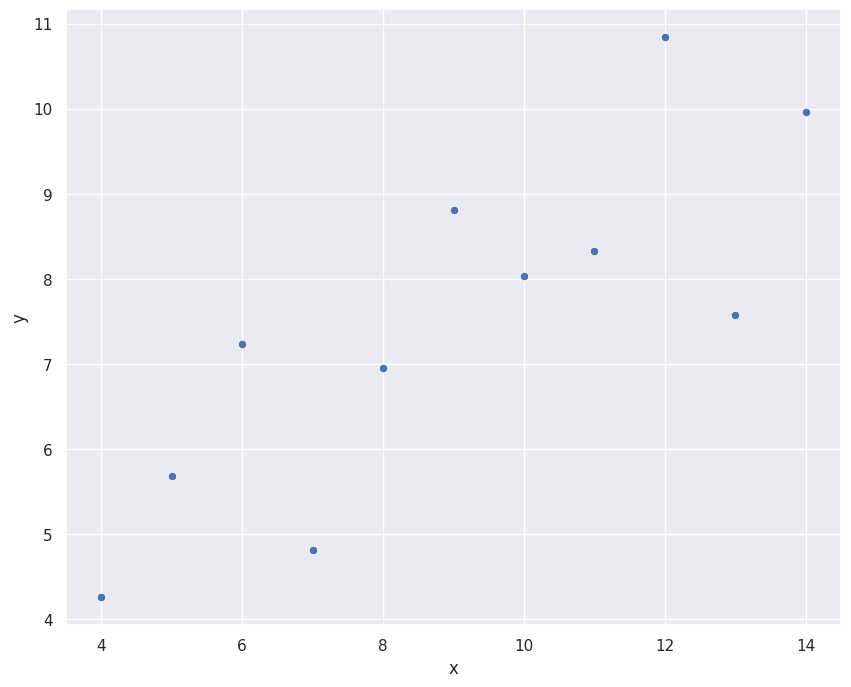

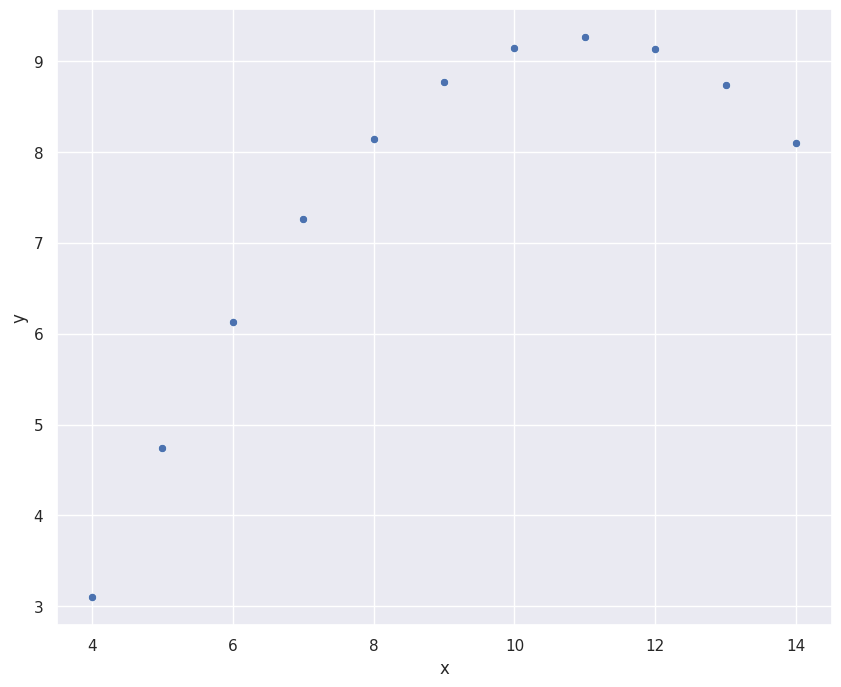

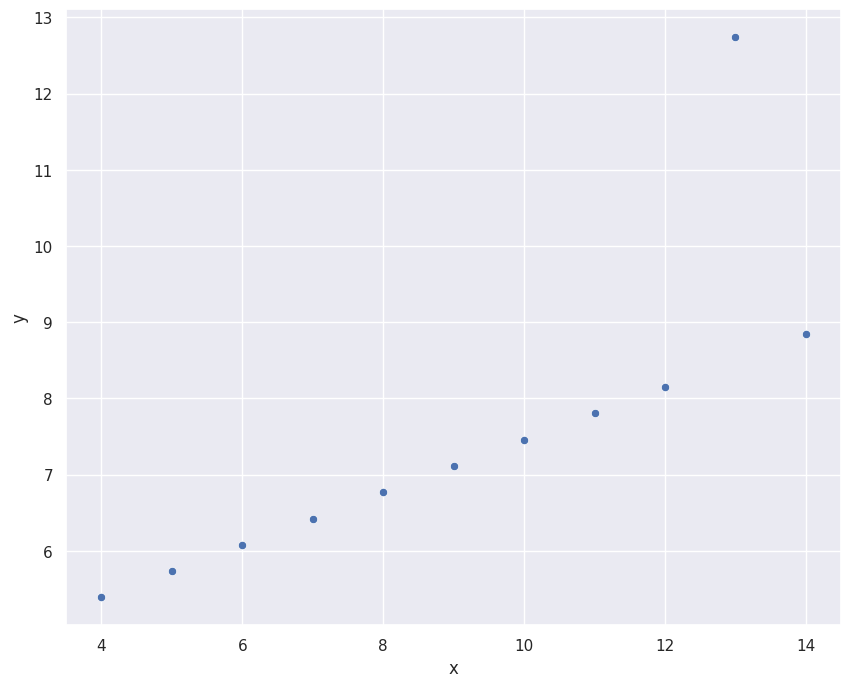

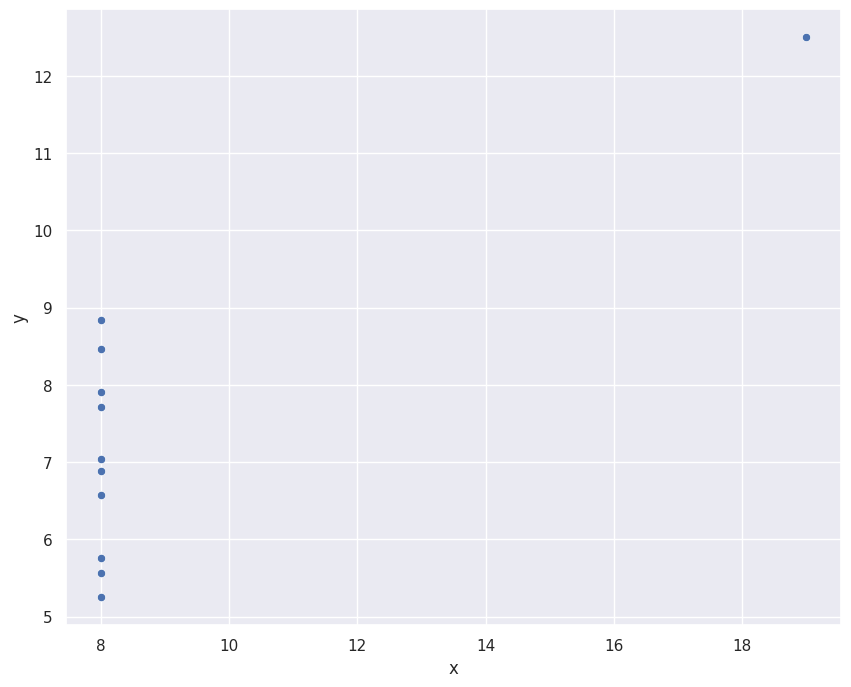

In [190]:
df = sns.load_dataset("anscombe")
sns.set_theme(style="whitegrid")
dI   = df[df["dataset"] == "I"][["x", "y"]]
dII  = df[df["dataset"] == "II"][["x", "y"]]
dIII = df[df["dataset"] == "III"][["x", "y"]]
dIV  = df[df["dataset"] == "IV"][["x", "y"]]
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    data=dI,
)
plt.show()
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    data=dII,
)
plt.show()
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    data=dIII,
)
plt.show()
sns.set(rc={'figure.figsize':(10,8)})
sns.scatterplot(
    x='x',
    y='y',
    data=dIV,
)
plt.show()

En el primero podemos notar que los puntos suben casi en linea rectas en el segundo tenemos una curva tipo parabola invertida, en el tercero es casi una recta perfecta pero hay un punto que esta mucho mas alto en el final, la cuarta podemos notar que tenemos casi todos los puntos en el mismo x y un punto mas que esta a la derecha arriba.

2. Utilice el comando `describe` para generar un resumen de las medidas estadísticas más relevantes para cada uno de los grupos del cuarteto de Anscombe. A partir de estos resultados, interprete las estadísticas obtenidas, destacando las características más significativas de cada grupo y cómo pueden influir en la comprensión de sus respectivas distribuciones.


In [191]:
desc_I = dI.describe().round(3)
desc_II= dII.describe().round(3)
desc_III=dIII.describe().round(3)
desc_IV =dIV.describe().round(3)

print("I:\n",desc_I)
print("II:\n",desc_II)
print("III:\n",desc_III)
print("IV:\n",desc_IV)

I:
             x       y
count  11.000  11.000
mean    9.000   7.501
std     3.317   2.032
min     4.000   4.260
25%     6.500   6.315
50%     9.000   7.580
75%    11.500   8.570
max    14.000  10.840
II:
             x       y
count  11.000  11.000
mean    9.000   7.501
std     3.317   2.032
min     4.000   3.100
25%     6.500   6.695
50%     9.000   8.140
75%    11.500   8.950
max    14.000   9.260
III:
             x      y
count  11.000  11.00
mean    9.000   7.50
std     3.317   2.03
min     4.000   5.39
25%     6.500   6.25
50%     9.000   7.11
75%    11.500   7.98
max    14.000  12.74
IV:
             x       y
count  11.000  11.000
mean    9.000   7.501
std     3.317   2.031
min     8.000   5.250
25%     8.000   6.170
50%     8.000   7.040
75%     8.000   8.190
max    19.000  12.500


Notemos que los 4 grupos tienen n =11 la media igual a 9 en x y en y tiene una de 7.5 y desviacion estadar muy iguales, tiene algo de diferencia en el grupo II hay un minimo muy bajo y grupo III tenemos un maximo muy alto y grupo IV notemos que casi todos los x estan en 8 y uno en 19 el mas alto, es decir que los extremos revelan una especie de asimetria y podemos notar que hya puntos que son dispersos o se mantienen.

3. Ajuste un modelo de regresión lineal para cada grupo utilizando **sklearn**. Calcule las métricas de evaluación, como el error cuadrático medio (MSE) y R², y grafique los resultados de la regresión. Interprete los resultados y su impacto en la calidad del ajuste.



intercepto:3.0001
pendiente:0.5001
MSE:1.2512
R^2:0.6665


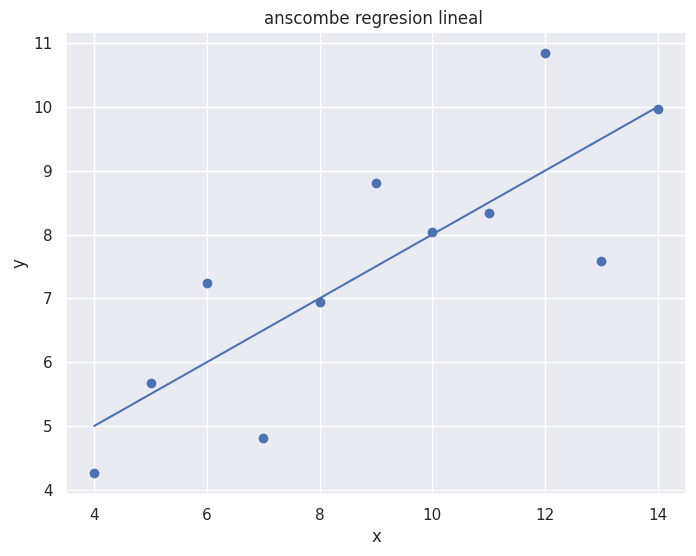

intercepto:3.0009
pendiente:0.5000
MSE:1.2524
R^2:0.6662


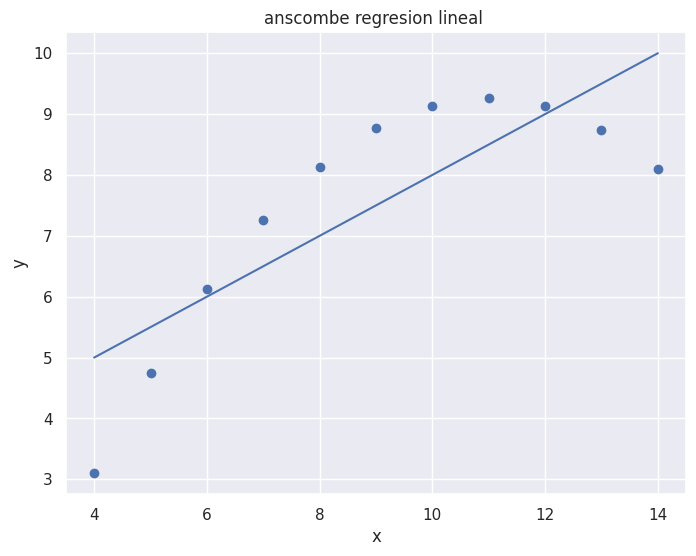

intercepto:3.0025
pendiente:0.4997
MSE:1.2506
R^2:0.6663


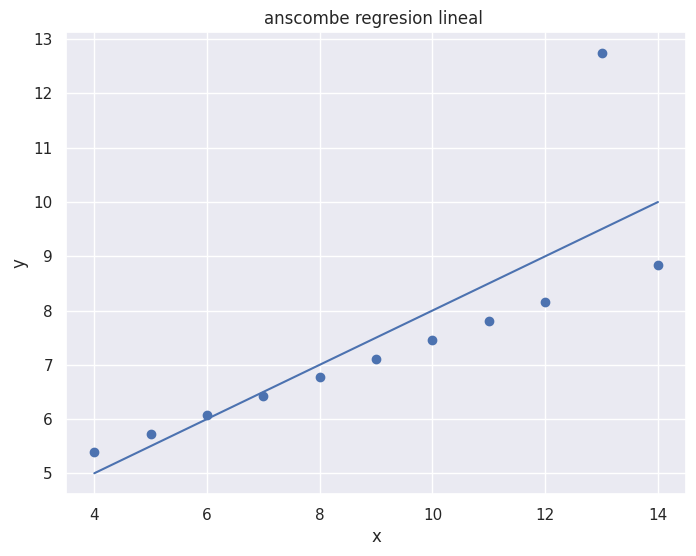

intercepto:3.0017
pendiente:0.4999
MSE:1.2493
R^2:0.6667


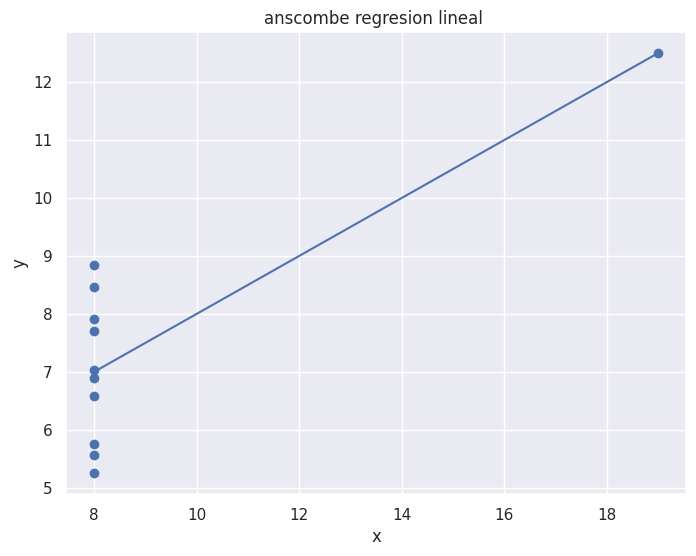

In [192]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
for i in (dI, dII, dIII, dIV):
  X = i[["x"]].to_numpy()
  y =i["y"].to_numpy()
  lin = LinearRegression().fit(X, y)
  y_hat = lin.predict(X)
  mse = mean_squared_error(y, y_hat)
  r2  = r2_score(y, y_hat)
  print(f"intercepto:{lin.intercept_:.4f}")
  print(f"pendiente:{lin.coef_[0]:.4f}")
  print(f"MSE:{mse:.4f}")
  print(f"R^2:{r2:.4f}")
  x_grid =np.linspace(i["x"].min(),i["x"].max(), 200).reshape(-1, 1)
  y_grid= lin.predict(x_grid)
  plt.figure(figsize=(8, 6))
  plt.scatter(i["x"], i["y"])
  plt.plot(x_grid, y_grid)
  plt.title(f"anscombe regresion lineal ")
  plt.xlabel("x"); plt.ylabel("y"); plt.grid(True)
  plt.show()


En el grupo I la recta representa bien los datos, en el grupo II hay una parabola invertida asi que la recta no ayuda mucho , en el grupo III se puede notar claramente que hay un outlier arriba a la derecha y hace que la recta no quede bien  y el grupo IV casi todos los puntos estan en x=8 entonces la recta no queda bien representada para los datos.

4. Es evidente que el ajuste lineal no es adecuado para algunos grupos. Existen diversas estrategias para abordar este problema, como eliminar outliers o emplear diferentes modelos de regresión. Identifique una estrategia que podría mejorar el ajuste del modelo de regresión lineal y, si lo considera necesario, implemente otros modelos alternativos para aquellos casos donde el ajuste lineal resulte inadecuado.

No creo que sea necesario cambiar el del grupo II

modelo cuadratico: y^=-5.9957 +2.7808·x+-0.1267·x^2
MSE= 0.0000 R^2= 1.0000


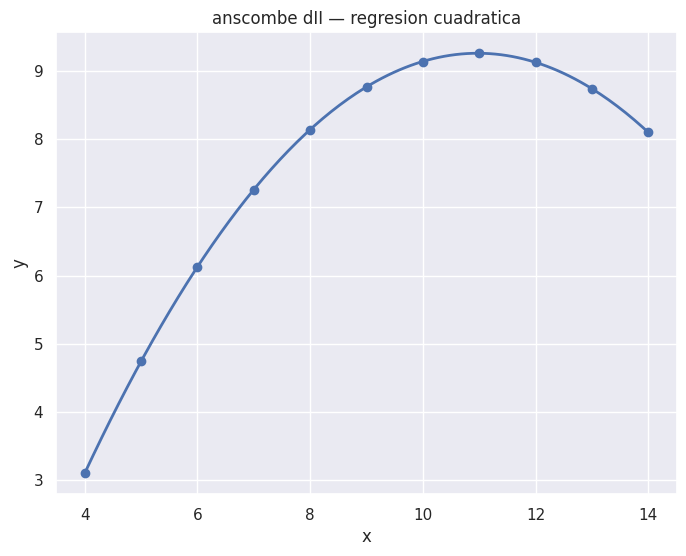

In [193]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
X=dII[["x"]].to_numpy()
y =dII["y"].to_numpy()
X_quad =np.c_[X, X**2]
lin2 =LinearRegression().fit(X_quad, y)
y_hat = lin2.predict(X_quad)
mse =mean_squared_error(y,y_hat)
r2= r2_score(y,y_hat)
b0 =lin2.intercept_
b1,b2=lin2.coef_
print(f"modelo cuadratico: y^={b0:.4f} +{b1:.4f}·x+{b2:.4f}·x^2")
print(f"MSE= {mse:.4f} R^2= {r2:.4f}")
xg=np.linspace(X.min(),X.max(), 200).reshape(-1, 1)
Xg_quad =np.c_[xg,xg**2]
yg =lin2.predict(Xg_quad)
plt.figure(figsize=(8, 6))
plt.scatter(dII["x"], dII["y"])
plt.plot(xg, yg, linewidth=2)
plt.title("anscombe dII — regresion cuadratica")
plt.xlabel("x"); plt.ylabel("y"); plt.grid(True)
plt.show()

Con outlier:b0=3.002, b1=0.500, MSE=1.251, R2=0.666
Sin outlier:b0=4.006, b1=0.345, MSE=0.000, R2=1.000


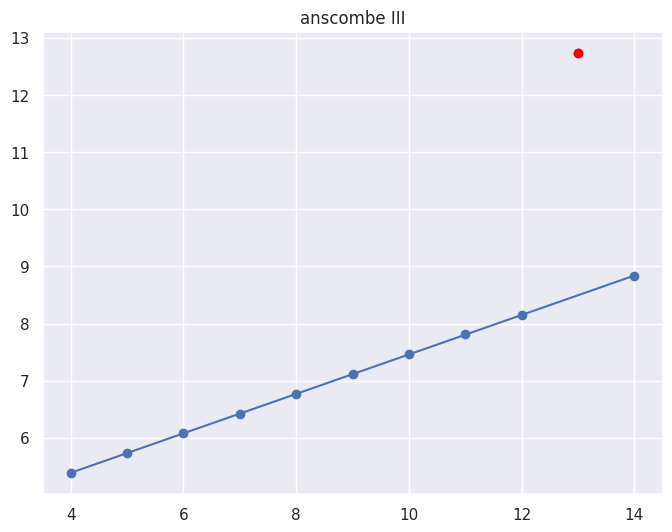

In [194]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
X =dIII[['x']].to_numpy()
y = dIII['y'].to_numpy()
ols1 =LinearRegression().fit(X, y)
res=  y -ols1.predict(X)
iout= np.argmax(np.abs(res))
mask= np.ones(len(y), bool); mask[iout]= False
ols2 = LinearRegression().fit(X[mask], y[mask])
print(f"Con outlier:b0={ols1.intercept_:.3f}, b1={ols1.coef_[0]:.3f}, MSE={mean_squared_error(y, ols1.predict(X)):.3f}, R2={r2_score(y, ols1.predict(X)):.3f}")
print(f"Sin outlier:b0={ols2.intercept_:.3f}, b1={ols2.coef_[0]:.3f}, MSE={mean_squared_error(y[mask], ols2.predict(X[mask])):.3f}, R2={r2_score(y[mask], ols2.predict(X[mask])):.3f}")
xg = np.linspace(X.min(),X.max(),200).reshape(-1,1)
plt.figure(figsize=(8,6))
plt.scatter(X, y)
plt.scatter(X[iout], y[iout], color="red",zorder=3)
plt.plot(xg, ols2.predict(xg))
plt.grid(True); plt.title("anscombe III")
plt.show()

Con outlier: b0=-1.004, b1_y=1.334,MSE=3.333,R2=0.667
Sin outlier: b0=8.000, b1_y=0.000,MSE=0.000,R2=1.000


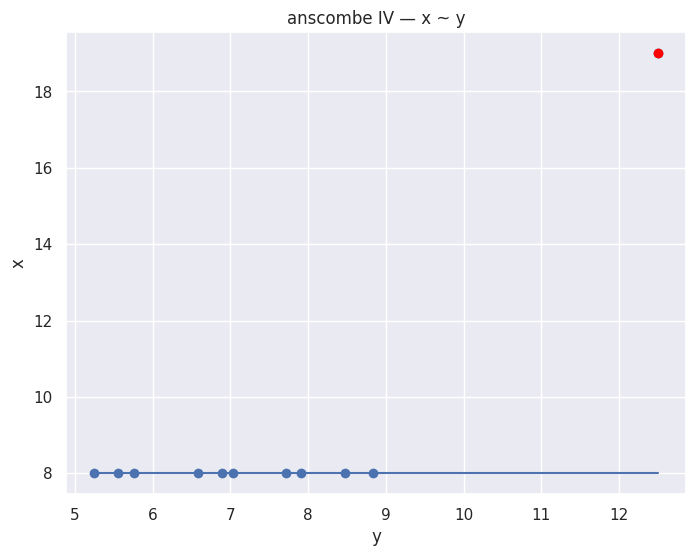

In [195]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
X = dIV[['y']].to_numpy()
y =dIV['x'].to_numpy()
ols1 =LinearRegression().fit(X, y)
res = y -ols1.predict(X)
iout =int(np.argmax(np.abs(res)))
mask =np.ones(len(y), dtype=bool)
mask[iout] = False
ols2 =LinearRegression().fit(X[mask], y[mask])
print(f"Con outlier: b0={ols1.intercept_:.3f}, b1_y={ols1.coef_[0]:.3f},"f"MSE={mean_squared_error(y,ols1.predict(X)):.3f},"f"R2={r2_score(y, ols1.predict(X)):.3f}")
print(f"Sin outlier: b0={ols2.intercept_:.3f}, b1_y={ols2.coef_[0]:.3f},"f"MSE={mean_squared_error(y[mask], ols2.predict(X[mask])):.3f},"f"R2={r2_score(y[mask],ols2.predict(X[mask])):.3f}")
xg =np.linspace(dIV['y'].min(), dIV['y'].max(),200).reshape(-1,1)
plt.figure(figsize=(8,6))
plt.scatter(dIV['y'], dIV['x'])
plt.scatter(dIV['y'].iloc[iout], dIV['x'].iloc[iout], color="red", zorder=3)
plt.plot(xg,ols2.predict(xg))
plt.xlabel("y"); plt.ylabel("x")
plt.title("anscombe IV — x ~ y")
plt.grid(True)
plt.show()